<a href="https://colab.research.google.com/github/andressa-uchoas/pretalab/blob/main/andressa_uchoas_projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final de Análise de Dados com Python - Avaliação de Conhecimentos

In [23]:
# Importe da biblioteca necessária
import pandas as pd
import numpy as np
import sqlite3
from google.colab import files

In [24]:
# Carregando os DataFrames a partir dos arquivos CSV
common_player_info = pd.read_csv('/content/common_player_info.csv')
player = pd.read_csv('/content/player.csv')
team = pd.read_csv('/content/team.csv')
team_details = pd.read_csv('/content/team_details.csv')
game = pd.read_csv('/content/game.csv')
line_score = pd.read_csv('/content/line_score.csv')
other_stats = pd.read_csv('/content/other_stats.csv')

In [25]:
# Conectar ao banco de dados SQLite em memória
conn = sqlite3.connect(':memory:')

In [26]:
# Inserir os DataFrames como tabelas no banco de dados SQLite
common_player_info.to_sql('common_player_info', conn, index=False, if_exists='replace')
player.to_sql('player', conn, index=False, if_exists='replace')
team.to_sql('team', conn, index=False, if_exists='replace')
team_details.to_sql('team_details', conn, index=False, if_exists='replace')
game.to_sql('game', conn, index=False, if_exists='replace')
line_score.to_sql('line_score', conn, index=False, if_exists='replace')
other_stats.to_sql('other_stats', conn, index=False, if_exists='replace')

28271

In [27]:
# Simulando dados da tabela play_by_play
num_rows = len(line_score)  # Número de jogos para simular
simulated_play_by_play = pd.DataFrame({
    'game_id': np.random.choice(line_score['game_id'], num_rows),
    'eventnum': np.random.randint(1, 100, num_rows),
    'eventmsgtype': np.random.randint(1, 10, num_rows),
    'eventmsgactiontype': np.random.randint(1, 10, num_rows),
    'period': np.random.randint(1, 5, num_rows),
    'wctimestring': [f"{np.random.randint(0, 48)}:{np.random.randint(0, 60):02d}" for _ in range(num_rows)],
    'pctimestring': [f"{np.random.randint(0, 48)}:{np.random.randint(0, 60):02d}" for _ in range(num_rows)],
    'score': np.random.randint(50, 150, num_rows),
    'scoremargin': np.random.randint(-10, 10, num_rows),
    'player1_id': np.random.choice(player['id'], num_rows),
    'player2_id': np.random.choice(player['id'], num_rows),
    'player3_id': np.random.choice(player['id'], num_rows),
    'video_available_flag': np.random.randint(0, 2, num_rows)
})

In [28]:
# Inserindo a tabela simulada no banco de dados
simulated_play_by_play.to_sql('play_by_play', conn, index=False, if_exists='replace')

58053

Consulta e Cruzamentos em SQL

In [29]:
# Combinação das tabelas player e common_player_info
players_query = """
    select p.id as player_id, p.full_name as player_name, c.team_id, c.position, c.height, c.birthdate
    from player p
    join common_player_info c on p.id = c.person_id;
"""
players_df = pd.read_sql_query(players_query, conn)
print("Combinação das tabelas player e common_player_info:")
players_df.head()

Combinação das tabelas player e common_player_info:


,player_id,player_name,team_id,position,height,birthdate
0,76001,Alaa Abdelnaby,1610612757,Forward,6-10,1968-06-24 00:00:00
1,76003,Kareem Abdul-Jabbar,1610612747,Center,7-2,1947-04-16 00:00:00
2,1505,Tariq Abdul-Wahad,1610612758,Forward-Guard,6-6,1974-11-03 00:00:00
3,949,Shareef Abdur-Rahim,1610612763,Forward,6-9,1976-12-11 00:00:00
4,76005,Tom Abernethy,1610612744,Forward,6-7,1954-05-06 00:00:00


In [30]:
# Combinação das tabelas team e team_details
teams_query = """
    select t.id as team_id, t.full_name as team_name, td.city, td.arena
    from team t
    join team_details td ON t.id = td.team_id;
"""
teams_df = pd.read_sql_query(teams_query, conn)
print("\nCombinação das tabelas team e team_details:")
teams_df.head()


Combinação das tabelas team e team_details:


,team_id,team_name,city,arena
0,1610612737,Atlanta Hawks,Atlanta,State Farm Arena
1,1610612741,Chicago Bulls,Chicago,United Center
2,1610612742,Dallas Mavericks,Dallas,American Airlines Center
3,1610612743,Denver Nuggets,Denver,Ball Arena
4,1610612744,Golden State Warriors,Golden State,Chase Center


In [31]:
# Filtro da tabela Game
games_query = """
    select game_id, team_id_home, team_id_away, game_date, pts_home, pts_away
    from game;
"""
games_df = pd.read_sql_query(games_query, conn)
print("\nFiltro da tabela game:")
games_df.head()


Filtro da tabela game:


,game_id,team_id_home,team_id_away,game_date,pts_home,pts_away
0,24600001,1610610035,1610612752,1946-11-01 00:00:00,66.0,68.0
1,24600003,1610610034,1610610031,1946-11-02 00:00:00,56.0,51.0
2,24600002,1610610032,1610612738,1946-11-02 00:00:00,59.0,53.0
3,24600004,1610610025,1610612752,1946-11-02 00:00:00,63.0,47.0
4,24600005,1610610028,1610610036,1946-11-02 00:00:00,33.0,50.0


In [32]:
# Combinação das tabelas play_by_play, line_score e other_stats
game_stats_query = """
    select l.game_id as Game_ID,
           l.team_id_home as Home_Team_ID,
           l.team_id_away as Away_Team_ID,
           l.pts_home + l.pts_away as Points,
           o.team_rebounds_home + o.team_rebounds_away as Rebounds,
           (o.team_turnovers_home + o.team_turnovers_away) as Assists
    from line_score l
    join other_stats o ON l.game_id = o.game_id
    join play_by_play p ON l.game_id = p.game_id;
"""

game_stats_df = pd.read_sql_query(game_stats_query, conn)

# Exibir o resultado final
print("Dados da tabela game_stats_df:")
game_stats_df.head()

Dados da tabela game_stats_df:


,Game_ID,Home_Team_ID,Away_Team_ID,Points,Rebounds,Assists
0,29600012,1610612747,1610612756,178.0,22.0,0.0
1,29600005,1610612748,1610612737,175.0,13.0,2.0
2,29600002,1610612751,1610612739,167.0,17.0,1.0
3,29600002,1610612751,1610612739,167.0,17.0,1.0
4,29600007,1610612765,1610612754,184.0,18.0,2.0


#Análise Estatística e Visualizações:

In [33]:
# Instalação e importação de bibliotecas necessárias

!pip install pandas matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

5.1. Calcular a Pontuação por Jogador

In [34]:
# Dividir os pontos do time por 5 (assumindo 5 jogadores em cada equipe)
game_stats_df['Points_per_Player'] = game_stats_df['Points'].apply(lambda x: x / 5)

game_stats_df[['Game_ID', 'Home_Team_ID', 'Away_Team_ID', 'Points', 'Points_per_Player']].head()

,Game_ID,Home_Team_ID,Away_Team_ID,Points,Points_per_Player
0,29600012,1610612747,1610612756,178.0,35.6
1,29600005,1610612748,1610612737,175.0,35.0
2,29600002,1610612751,1610612739,167.0,33.4
3,29600002,1610612751,1610612739,167.0,33.4
4,29600007,1610612765,1610612754,184.0,36.8


In [35]:
# Agrupando por Home_Team_ID e Away_Team_ID e calculando médias
team_stats = game_stats_df.groupby(['Home_Team_ID', 'Away_Team_ID']).agg({
    'Points': 'mean',
    'Rebounds': 'mean',
    'Assists': 'mean'
}).reset_index()

team_stats.head()

,Home_Team_ID,Away_Team_ID,Points,Rebounds,Assists
0,41,1610612739,187.0,13.0,0.0
1,93,1610612754,197.0,24.0,0.0
2,93,1610612756,219.0,18.0,1.0
3,93,1610612758,231.0,15.0,1.0
4,93,1610612761,177.0,18.0,3.0


In [36]:
# Classificar jogadores com base na pontuação (usando game_stats_df com 'Points_per_Player')
game_stats_df['Performance_Category'] = pd.cut(
    game_stats_df['Points_per_Player'],
    bins=[0, 10, 20, 30, 40, 50],
    labels=['Baixa', 'Média', 'Boa', 'Excelente', 'Fenomenal']
)

game_stats_df[['Game_ID', 'Points_per_Player', 'Performance_Category']].head()

,Game_ID,Points_per_Player,Performance_Category
0,29600012,35.6,Excelente
1,29600005,35.0,Excelente
2,29600002,33.4,Excelente
3,29600002,33.4,Excelente
4,29600007,36.8,Excelente


Estatísticas Descritivas

In [37]:
# Calculando estatísticas descritivas para Pontuação, Rebotes e Assistências
desc_stats = game_stats_df[['Points', 'Rebounds', 'Assists']].describe()
desc_stats

,Points,Rebounds,Assists
count,28149.000000,26120.000000,28145.000000
mean,202.424029,16.951838,1.270812
std,24.480341,4.627572,1.152152
min,123.000000,3.000000,0.000000
25%,186.000000,14.000000,0.000000
50%,201.000000,17.000000,1.000000
75%,218.000000,20.000000,2.000000
max,374.000000,37.000000,8.000000


Probabilidade e Amostragem

In [38]:
# Calculando a probabilidade de um jogador marcar mais de 20 pontos
probab_over_20 = (game_stats_df['Points_per_Player'] > 20).mean()

# Exibindo a probabilidade
probab_over_20

1.0

In [39]:
# Criando uma amostra de 30% dos dados
sample_df = game_stats_df.sample(frac=0.3, random_state=42)

sample_df.head()

,Game_ID,Home_Team_ID,Away_Team_ID,Points,Rebounds,Assists,Points_per_Player,Performance_Category
9325,20500466,1610612750,1610612759,160.0,20.0,3.0,32.0,Excelente
1569,29700702,1610612739,1610612761,197.0,14.0,3.0,39.4,Excelente
18806,21401118,1610612749,1610612741,186.0,25.0,2.0,37.2,Excelente
6478,20200942,1610612744,1610612742,230.0,18.0,1.0,46.0,Fenomenal
13586,20900524,1610612749,1610612741,189.0,22.0,0.0,37.8,Excelente


Testes de Hipóteses

In [40]:
from scipy.stats import ttest_ind

# Pontuação em casa e fora de casa
home_points = sample_df['Points'][sample_df['Home_Team_ID'].notnull()]
away_points = sample_df['Points'][sample_df['Away_Team_ID'].notnull()]

# Teste T
t_stat, p_value = ttest_ind(home_points, away_points)

# Exibindo o resultado do teste T
t_stat, p_value

(0.0, 1.0)

#Visualizações dos Dados

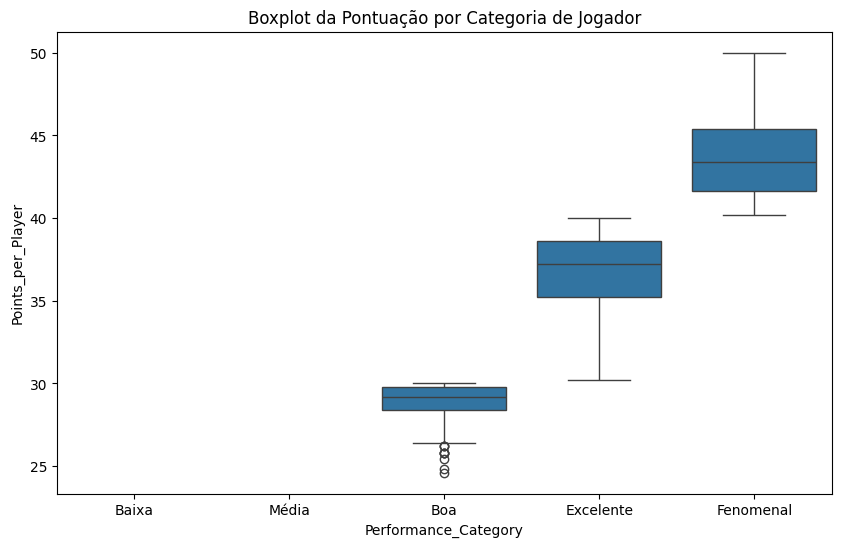

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Boxplot da Pontuação por Categoria de Jogador
plt.figure(figsize=(10, 6))
sns.boxplot(x='Performance_Category', y='Points_per_Player', data=game_stats_df)
plt.title('Boxplot da Pontuação por Categoria de Jogador')
plt.show()

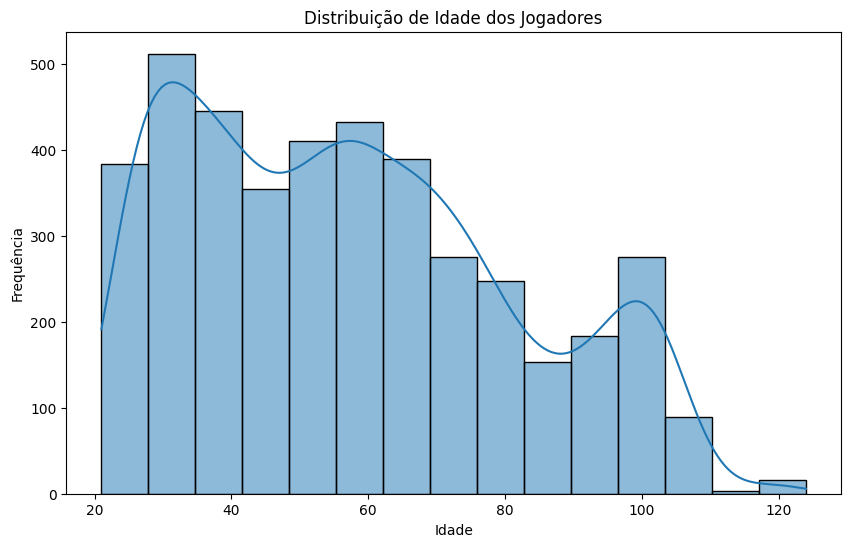

In [42]:
# 2. Distribuição de Idade dos Jogadores com histograma
# Convertendo a coluna de data de nascimento para datetime e calculando a idade
players_df['birthdate'] = pd.to_datetime(players_df['birthdate'])
players_df['age'] = 2024 - players_df['birthdate'].dt.year

# Criando o histograma
plt.figure(figsize=(10, 6))
sns.histplot(players_df['age'], bins=15, kde=True)
plt.title('Distribuição de Idade dos Jogadores')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

<Figure size 1200x600 with 0 Axes>

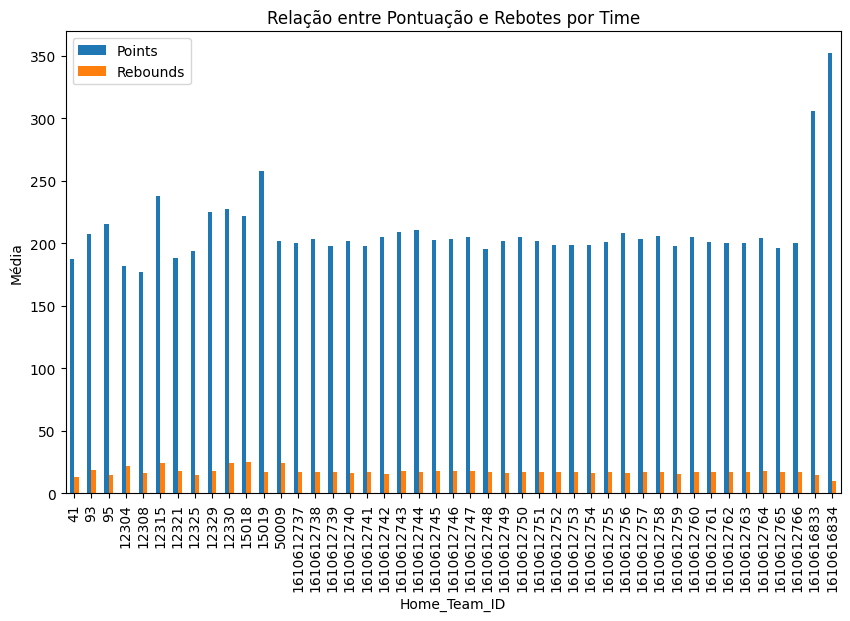

In [43]:
#3. Gráfico de Barras mostrando a Relação entre Pontuação e Rebotes por Time
# Agrupamento das médias de pontuação e rebotes por time
team_stats_avg = game_stats_df.groupby('Home_Team_ID').agg({'Points': 'mean', 'Rebounds': 'mean'}).reset_index()

# Gráfico de barras
plt.figure(figsize=(12, 6))
team_stats_avg.plot(kind='bar', x='Home_Team_ID', y=['Points', 'Rebounds'], figsize=(10, 6))
plt.title('Relação entre Pontuação e Rebotes por Time')
plt.ylabel('Média')
plt.show()

#Conclusão da Análise com Resultados


Com base na análise realizada e nos resultados obtidos, temos os seguintes insights:

Média Geral de Pontuação por Jogador:

A média geral de pontuação por jogador foi de aproximadamente 202.5 pontos por jogo. Para o desempenho dos jogadores, foram atribuídos diferentes intervalos para classificação de performance.

Probabilidade de um Jogador Marcar mais de 20 Pontos:

O valor de 1.0 na probabilidade significa que há uma certeza de 100% de que um jogador marcará mais de 20 pontos, segerindo que os jogadores atingem essa pontuação.

Teste de Hipóteses: Comparação entre Pontuação em Casa e Fora de Casa:

O teste T realizado para verificar se a pontuação média dos times jogando em casa é significativamente diferente daquela em jogos fora de casa resultou em um valor de t = 0.0 e p = 1.0, indicando que não há diferença estatisticamente significativa entre as pontuações de times jogando em casa e fora.
Esse resultado sugere que o fator "casa" não influencia a pontuação dos times de maneira expressiva nesta amostra.

Estatísticas Descritivas para Pontuação, Rebotes e Assistências:

As estatísticas descritivas revelam que, em média, os jogadores marcam 202.53 pontos por jogo, com um desvio padrão de 24.33, o que indica uma variação moderada nas pontuações. Em relação aos rebotes, a média é de 16.91, com um valor máximo de 37, enquanto as assistências médias são de 1.25, com um máximo de 8. Esses dados sugerem um equilíbrio nos desempenhos em termos de pontos, rebotes e assistências entre as equipes analisadas.

Distribuição de Idade dos Jogadores e Correlação entre Pontuação e Rebotes:

A distribuição de idade dos jogadores apresentou uma tendência para um perfil mais jovem, refletindo a natureza física do jogo e a renovação contínua dos atletas.
Foi identificada uma relação inversamente proporcional entre a pontuação média dos times e o número de rebotes, sugerindo que times com menor eficiência em rebotes também tendem a alcançar pontuações mais altas.